In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784', as_frame=False)

In [ ]:
mnist

In [ ]:
x, y = mnist['data'], mnist['target']

In [ ]:

y.shape

In [ ]:
x.shape

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
some_digit = x[36011]
some_digit_image = some_digit.reshape(28,28)

In [ ]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')

In [ ]:
y[3601]

In [ ]:
x_train, x_test = x[:60000], x[60000:]

In [ ]:
y_train, y_test = y[:60000], y[60000:]

In [ ]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [ ]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression( solver='lbfgs')

In [ ]:
clf.fit(x_train, y_train_2)

In [ ]:
clf.predict([some_digit])

In [ ]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2,cv=3, scoring ='accuracy')

In [ ]:
a.mean()

## Precision, Recall, F1-score

In [ ]:
from sklearn.model_selection import cross_val_predict
y__train_pred = cross_val_predict(clf, x_train, y_train_2, cv=3)

In [ ]:
y__train_pred

## Calculating Confusion

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_train_2,y__train_pred)

## Precision & Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_train_2,y__train_pred)

In [ ]:
recall_score(y_train_2,y__train_pred)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_2,y__train_pred)

## Ploting cure P-R

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_scores = cross_val_predict(clf, x_train, y_train_2, method ='decision_function')

In [ ]:
y_scores

In [ ]:
precision , recalls, thresholds = precision_recall_curve(y_train_2,y_scores)

In [ ]:
precision

In [ ]:
recalls

In [ ]:
thresholds

In [ ]:
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recalls')
plt.xlabel('Thresholds')
plt.legend()
plt.ylim([0,1])

In [ ]:
plt.plot(precision,recalls)

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train_2,y_scores)
plt.plot(fpr, tpr )
plt.plot([0,1] ,'g--')
plt.ylim([0,1])
plt.xlim([0,1])


## OVA Strategy

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_clf = SGDClassifier()

In [ ]:
sgd_clf.fit(x_train,y_train)


In [ ]:
sgd_clf.predict([some_digit])

In [ ]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [ ]:
some_digit_scores

In [ ]:
np.argmax(some_digit_scores) #max score gain by classifier from 10

In [ ]:
sgd_clf.classes_

## Forcing for OVO

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

In [ ]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

In [ ]:
ovo_clf.fit(x_train,y_train)

In [ ]:
ovo_clf.predict([some_digit])

In [ ]:
sgd_clf.classes_

In [ ]:
len(ovo_clf.estimators_)

## Random Forest Classifier decision

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc_clf = RandomForestClassifier()

In [ ]:
rfc_clf.fit(x_train,y_train)

In [ ]:
rfc_clf.predict([some_digit])

## Analysing error in previsiously builed models

In [ ]:
y_train_prep= cross_val_predict(sgd_clf, x_train,y_train, cv=3)
confm = confusion_matrix(y_train, y_train_prep)

In [ ]:
confm

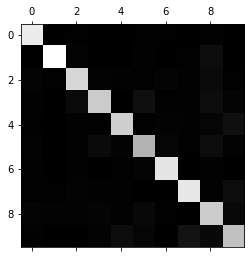

In [68]:
plt.matshow(confm, cmap=plt.cm.gray)

## Comparing error rates insted of absolute number of errors

In [ ]:
row_sum = confm.sum(axis=1, keepdims=True)
norm_confm = confm/row_sum
norm_confm

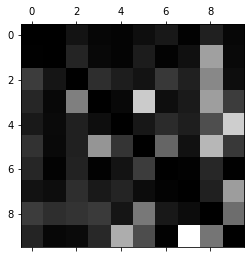

In [69]:
np.fill_diagonal(norm_confm,0)
plt.matshow(norm_confm, cmap=plt.cm.gray)

## Multilabel Classification

In [70]:
from sklearn.neighbors import KNeighborsClassifier

### np.c_[np.array([1,2,3]), np.array([4,5,6])]   into  
array([[1, 4],
       [2, 5],
       [3, 6]])

In [73]:
y_train_large = (y_train>= 7)
y_train_odd = (y_train%2 == 1)
y_train_even = (y_train%2 == 0)
y_multilb = np.c_[y_train_large,y__train_odd,y__train_even]

In [74]:
kn_clf = KNeighborsClassifier()
kn_clf.fit(x_train, y_multilb)

KNeighborsClassifier()

In [75]:
kn_clf.predict([some_digit])

array([[False,  True, False]])